IMPORTING

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random 
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import random

In [3]:
stroke = pd.read_csv("C:/Users/e u n o i a/Downloads/healthcare-dataset-stroke-data.csv")

ANALYSIS

In [4]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
stroke = stroke.drop("id", axis = 1)

In [8]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


DATA VISUALISATION

<AxesSubplot:xlabel='stroke', ylabel='count'>

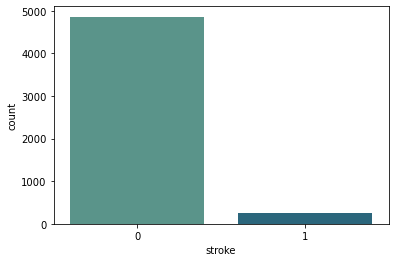

In [9]:
sns.countplot(x = "stroke", data = stroke, palette = "crest")

Text(0.5, 0, 'Skewness')

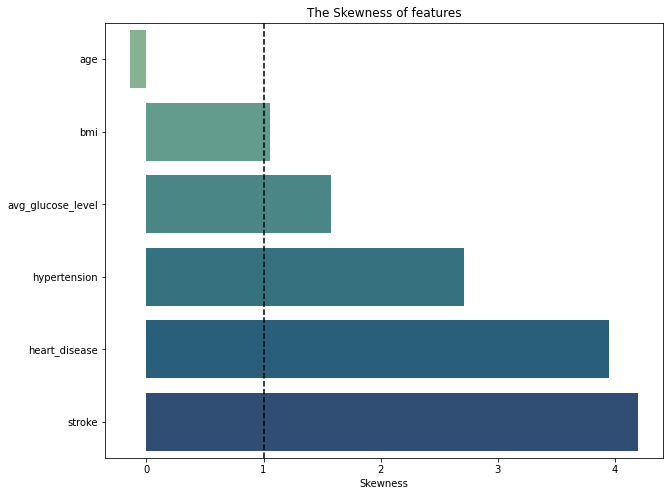

In [10]:
plt.figure(figsize=(10,8))
skewness=stroke.skew().sort_values()
sns.barplot(x=skewness,y=skewness.index, palette= "crest").set_title('The Skewness of features')
plt.axvline(x=1, color='black', linestyle='--')
plt.xlabel('Skewness')


<AxesSubplot:xlabel='count', ylabel='work_type'>

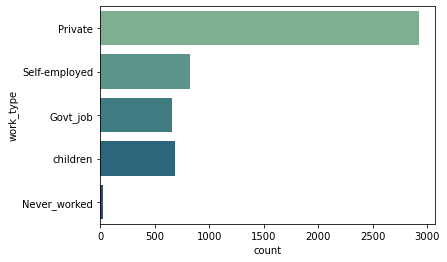

In [11]:
sns.countplot(y = "work_type", data = stroke, palette = "crest") #mostly they were privately hired

<AxesSubplot:xlabel='gender', ylabel='count'>

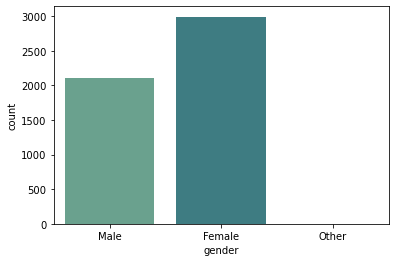

In [12]:
sns.countplot(x = "gender", data = stroke, palette = "crest")#more women

<AxesSubplot:xlabel='stroke', ylabel='age'>

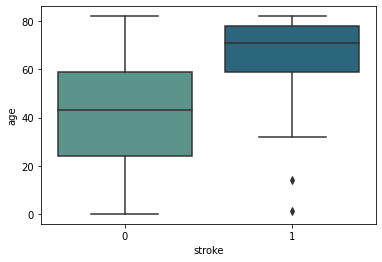

In [13]:
sns.boxplot(x = stroke["stroke"], y = stroke["age"], palette="crest" ) #IMPORTANT

<AxesSubplot:xlabel='stroke', ylabel='gender'>

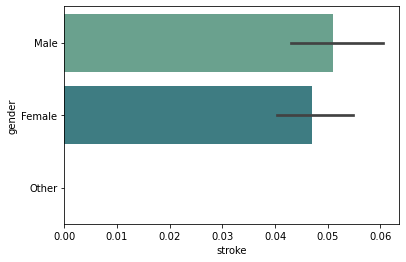

In [14]:
sns.barplot(x = stroke["stroke"], y = stroke["gender"], palette="crest" )

<AxesSubplot:xlabel='stroke', ylabel='Residence_type'>

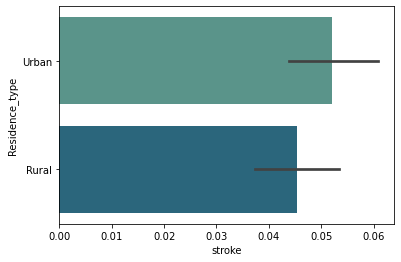

In [15]:
sns.barplot(x = stroke["stroke"], y = stroke["Residence_type"], palette="crest" )

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

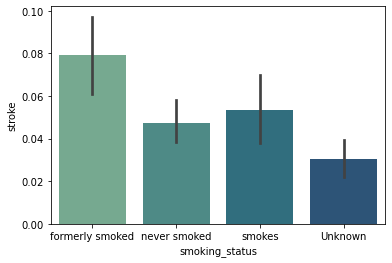

In [16]:
sns.barplot(x = stroke["smoking_status"], y = stroke["stroke"], palette="crest" )

DATA TRANSFORMATION

In [17]:
g = pd.get_dummies(data = stroke, columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"] )

In [18]:
g.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [19]:
g = g[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'stroke']]

In [20]:
g

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,61.0,0,0,202.21,NaN,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
5107,35.0,0,0,82.99,30.6,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0


In [21]:
array = g.values
random.shuffle(array)
random.shuffle(array)
random.shuffle(array)
X = array[:,0:21]
Y = array[:,21]
Y=Y.astype('int')
X=X.astype('int')
validation_size = 0.2
seed = 101
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [22]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [23]:
prediction = model.predict(X_test)
prediction

array([0, 1, 1, ..., 0, 1, 0])

In [24]:
print(confusion_matrix(Y_test,prediction))

[[372   5]
 [  2 643]]


In [25]:
report = classification_report(Y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       377
           1       0.99      1.00      0.99       645

    accuracy                           0.99      1022
   macro avg       0.99      0.99      0.99      1022
weighted avg       0.99      0.99      0.99      1022



In [27]:
preds = pd.DataFrame({'y_pred': prediction, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

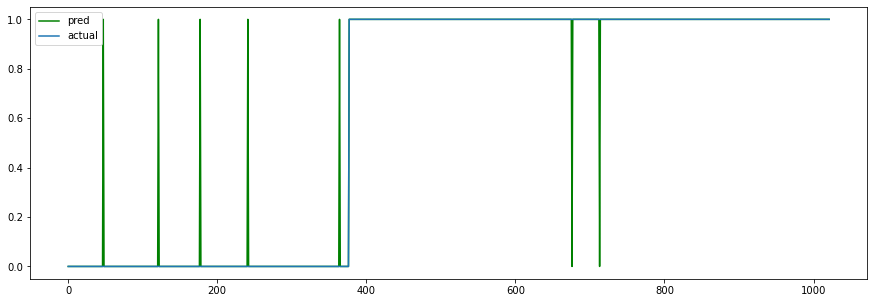

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', color="green")
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()